<a href="https://colab.research.google.com/github/fidanfatih/NLP_Projects/blob/main/Hepsiburada_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP with DL (Standart application with Keras)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/hepsiburada.zip')
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


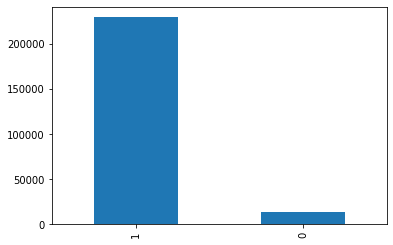

In [12]:
df.Rating.value_counts().plot.bar();

## Tokenization

In [7]:
X = df['Review'].values
y = df['Rating'].values

In [8]:
num_words = 15000 
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
tokenizer.fit_on_texts(X)


* Word embeddingte 10bin-15bin veya 20bin kelime kullanilir, daha fazla kelime kullanmak maliyeti artirir vemodel basarisina onemli bir katki sunmaz.
* corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. num_words=None atanırsa tüm kelimeler dikkate alınır.Tum corpusla egitirseniz bu sure maliyeti olusturur. 
* Tokenizer().fit_on_texts() fonksiyonu cleaning islemini yaparken default olarak yalniz punctuations temizligi yapar. Ancak istenirse Tokenizer(filter='.....') filters icine rakamlar da yazilarak digid degerler corpustan temizlenebilir.
* Tokenizer().fit_on_texts() fonksiyonu cleaning islemini yapiyor ancak lemma yapmaz.Cunku Word Embeding te Lemmatization yapmiyoruz. Word Embeding, her kelime icin vektor olusturulur ve her kelimenin baska kelime ile kullanim iliskisi ve anlam bagini kurar. Mesela lemma yapip, yapim ekini atarsaniz kelime farkli bir anlama ve anlam bagina sahip olur.
* Anlam Bagi ne demek? Mesela "Eve geldim." "Evden gittim." Burada word Embedding "evden"-"gitmek" ve "eve"-"gelmek" arasinda anlam baglantisi olusturur ve bunlari birbiriyle iliskilendirir.
* CountVektorizer ve TF-IDF te kelimelerin birbirleriyle anlam baglami olmadigi icin lemma veya stem yapilir.
* Word embedding te stopwords temizligi de yapilmiyor. Stopword ler yaklasik 200 adet. 15bin icinde 200 kelime cok onem arzetmez. Ote yandan Deep Learning kelimeleri agirliklandiracagi icin model bu kelimeleri onemsizlestirecektir. Dolayisiyla stopword leri drop etmenin herhangi bir katkisi olmayacaktir.



## Creating word index

* word_index: en fazla kullanilan kelimeleri kullanim sıklığına gore buyukten kucuge siralar. Kelimenin onundeki sayi, kelimenin kullanim sıklığı degil, kullanim sıklığına gore hiyerarsi siralamasinin ifade eder. yani 1 ise en cok kullanilan kelime demektir. Burada sıfır kullanmaz, onu dolgulamada kullanacak.
* word_index degerleri ne icin kullanilir? modelin dikkate alacagi 15bin kelime yerine 1den 15000'e kadar sayi atanir. Training sirasinda her cumledeki kelime yerine o kelimenin word index i konulur, word index i 15000 den buyuk olan kelimeler ise yok sayilir.

In [17]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [66]:
# en cok kullanilan 15bin kelimenin toplam kullanim sayisi
len(tokenizer.word_index)

217983

## Converting tokens to numeric

In [53]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
# X_num_tokens

In [54]:
X[0]

'3 yıldır tık demedi. :)'

In [55]:
X_num_tokens[0]

[52, 462, 1617, 4510]

In [56]:
len(X_num_tokens[0])

4

In [32]:
num_tokens = np.array([len(tokens) for tokens in X_num_tokens])
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

## Maximum number of tokens for all documents

In [35]:
# The number of tokens of the long comment in the corpus.
num_tokens.max()

298

In [36]:
# the index of the long comment in the corpus.
num_tokens.argmax()

21941

In [65]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [64]:
len(X[21941].split())
# = num_tokens.max() olmasi gerekiyor.

278

In [33]:
# Average number of tokens that a sentence in the corpus has
num_tokens.mean()

21.36101060793357

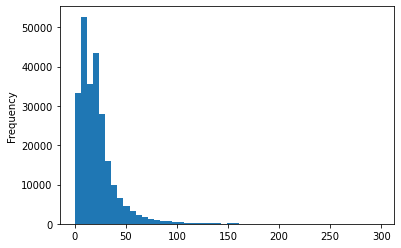

In [61]:
pd.Series(num_tokens).plot.hist(bins=50);

In [70]:
max_tokens = num_tokens.mean() + 2*num_tokens.std()
max_tokens = int(max_tokens)
max_tokens

61

In [71]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9598968365113328

* RNN e input olarak veriyi verirken her bir satir verinin ayni boyutta olmasi gerekiyor. Corpusta bazi cumle 4 tokenden olusuyor bazisi 20 token. Bunlari esit boyuta getirmek icin her documanin ortalama token sayisini buluruz. Biz bunu standart deviationa gore bir sınır degeri belirleriz. Bu sayidan daha az token iceren document lara 0 ile padding yapariz, daha fazla olanlari ise kırpacagız. Bu islemle anlamdan ihmal edilebilir bir feragat olacaktir(%4luk bir kayip var) ama herbir document ayni boyuta gelirken training maliyetide ve modelin calisma hizinda onemli oranda iyilesme olacaktir.

## Fixing token counts of all documents (pad_sequences)

In [72]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [73]:
X_pad.shape

(243497, 61)

In [74]:
X_pad

array([[    0,     0,     0, ...,   462,  1617,  4510],
       [    0,     0,     0, ...,   462,    55,   584],
       [   76,  3717,  1698, ...,   595,    16,  1816],
       ...,
       [    0,     0,     0, ...,    27,     7,     4],
       [    0,     0,     0, ...,  2740,   542,    33],
       [    0,     0,     0, ..., 12260,    92,    21]], dtype=int32)

In [75]:
np.array(X_num_tokens[0])

array([  52,  462, 1617, 4510])

In [76]:
X_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   52,  462, 1617, 4510], dtype=int32)

* corpusun ilk documanti 4 tokene sahipti. Boyutu 61e tamamlamak icin 0 ile padding yaptik.
* padding bastan itibaren 0 ile doldurur. Boylece tokenler arasi anlam baglantisi da korunmus olur. Ayni sekilde kirpmayi da onden yapar, Son 61 tokeni alir.

In [80]:
np.array(X_num_tokens[212558])

array([ 1789,  2440,     7,    44,  1837,    38,    84,   250,    85,
          84,  2181,    41,    26,   134,   209,     3,   716,    11,
         795,     5,  1478,    58,  1478,    72,   181,  1943,    44,
        1433,  4082,   947,   625,   636,    26,  2817,  5518,  3515,
         241,  1158,  1174,   454,   874,   755,     1,     7,     3,
          45,  2555,     1,     6,   585,  1068,  1160,   170,   811,
        2440,  1455,   472,  1785,  2704,  2223,   182,    49,     1,
           6,   188,     1,   402,    65,    65,  2330,   345, 13609,
         104,  1427,    46,    52,   261,    63,  3515,   260,   232,
        2108,    50,    12,     2, 10826,  5593,     5,    31, 12274,
        4819,     2,  2731,    60,    28,   111,  9906,     1,    79,
         571,  3637,   546,  5455,     1,     6,  2714,   373,   118,
         604,   250,  7804,  5277,  6164,  1263,    23,  2871,    14,
           6,   133,    56,  8334,    20,  3515,  1174,   170,    14,
           3,   402,

In [81]:
X_pad[212558]

array([ 367,    1,   24,   80,  133,   90,  245, 2219, 9352,    5,   39,
        315,   25,    6,   44,  245, 2233,    8, 9698,  167,   37,  275,
        232,    5, 3979,  134, 7919, 2118,  310,  437, 4901,   36,   25,
        138,  940,  590,    3, 1625,  590,   12,    5,  874,  335,    2,
       2204,   17,  501,  420,  961,   17,   36, 4289, 2091, 2740,   60,
          1,   96,    9,   10,  898, 4239], dtype=int32)

## Converting numeric tokens to string

In [82]:
index = tokenizer.word_index
inverse_map = dict(zip(index.values(), index.keys()))
inverse_map

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'iyi',
 7: 'güzel',
 8: 'için',
 9: 'tavsiye',
 10: 'ederim',
 11: 'daha',
 12: 'ama',
 13: 'da',
 14: 'gayet',
 15: 'hızlı',
 16: 'teşekkürler',
 17: 'aldım',
 18: 'de',
 19: 'ürünü',
 20: 'gibi',
 21: 'yok',
 22: 'uygun',
 23: 'olarak',
 24: 'kaliteli',
 25: 'en',
 26: '2',
 27: 'kargo',
 28: 'fiyat',
 29: 'elime',
 30: 'kadar',
 31: 'ile',
 32: 'göre',
 33: 'geldi',
 34: 'var',
 35: 'hepsiburada',
 36: 'ben',
 37: 'gerçekten',
 38: '1',
 39: 'fiyata',
 40: 'gün',
 41: 'sonra',
 42: 'cok',
 43: 'kesinlikle',
 44: 'telefon',
 45: 'biraz',
 46: 'hiç',
 47: 'ulaştı',
 48: 'memnun',
 49: 'hem',
 50: 'değil',
 51: 'kullanışlı',
 52: '3',
 53: 'mükemmel',
 54: 'oldu',
 55: 'kullanıyorum',
 56: 'önce',
 57: 'sipariş',
 58: 'tek',
 59: 'her',
 60: 'bence',
 61: 'harika',
 62: 'kalitesi',
 63: 'bi',
 64: 'ayrıca',
 65: '5',
 66: 'teşekkür',
 67: 'fiyatı',
 68: 'olması',
 69: 'ne',
 70: 'herkese',
 71: 'bile',
 72: 'uzun',
 73: 'süper',

In [84]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [85]:
X[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [86]:
tokens_to_string(X_num_tokens[800])

'ürünü alalı 3 hafta kadar oldu aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim'

* pad_sequences islemi sonrasi secilen bir dokument ta token sayisinin 61 e indirgendigini ve ihmal edilebilir bir anlam kaybi oldugu goruluyor.

# Modelling

* Trainin icin standart RNN ve LSTM in daha gelismis bir modeli olan ve yine bir RNN turevi olan GRU kullanacagiz.
* RNN de bir noronin ciktisi diger noronun girdisi oluyor ve noronlarin ciktilari sirali olarak birbirini etkiliyor.
* Cumlede kelimelerin hangi sira ile geldigi onemli hale geliyor. Kelimeyi "hidden state" dedigimiz hafizasinda tutuyor. Hafizasi olmasi da bunu diger modellerden bir adim one cikariyor.
* RNN in "Decent Gradient Vanishing/Exploding" denilen bir dezjavantaji var. Yani, uzun documentlar geldiginde tokenlerin anlam iliskisini koruyamiyor. Cumlenin basindaki kelimelerle, sonundaki kelimeler arasinda anlam butunlugunu kaybedebiliyor. Bu nedenle LSTM ve GRU modelleri gelistirilmistir. Bunlarda aradaki unutmasi gereken onemsiz kelimeleri model unutuyor. Boylece bir cumlede bastaki onemli kelimeyle sonlara dogru var olan onemli kelime arasindaki anlamsal iliskiyi goruyor.

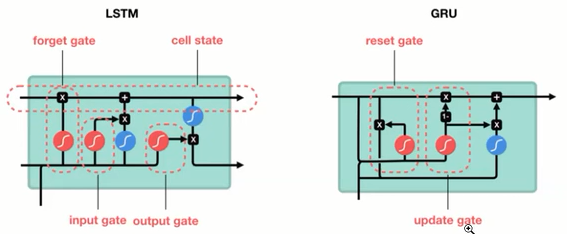

* GRU de yeni gelen kelime update gate ile aliniyor, diger noronlardan gelen bilgilerle degerlendirilip reset gate ile unutuluyor veya tutuluyor. LSTM de bu forget gate ile yapiliyor. Bunlarda Noronlarda ANN deki gibi Relu kullanilmaz,  output layerda tanh (mavi), diger layerlarda sigmoid (kirmizi) fonksiyonu kullanilir.

## Train Set Split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

In [99]:
model = Sequential()

In [100]:
embedding_size = 100

In [101]:
model.add(Embedding(input_dim=num_words, # unique kac farkli tokenle calisacagi (15000)
                    output_dim=embedding_size, # herbir tokenin 100luk vektore cevrilecegi
                    input_length=max_tokens, # Her cumlenin token sayisi (61)
                    name='embedding_layer'))

* Kelimelerin birbiriyle iliskilerini yakalamak icin her kelimeyi kelime vektorlerine ceviririz.
* Literaturde 50lik, 100luk,300luk, 748lik vektorler kullaniliyor. Ancak bu size kalmis birsey. WordtoVec te 100luk, 300luk kullanilir.
* Gloveda, Bertde egitilmis kelime vektorlerini de modele sokabiliyoruz. Pre-treined bir modeli kendi modelinize ithal edecekseniz, modelinizde embedding_size i pretreined modelin degerine getirmeniz gerekir. Yani eger bert ithal edecekseniz, embedding_size 748 olmali.
* Ancak burada bir sifirdan egitimini yapacagiz. Egitim icerisinde de kelime vektorlerimizde belli bir asamaya kadar egitilecek. Tabiki bu WordtoVec, Glove ve Bert in milyarlarca kelime ile egitilmis modelleri gibi olmayacaktir.

In [88]:
# GRU bazen numpy versiyonundan kaynakli hatalar verebiliyor. O durumda numpy==1.19.5 versiyonunu kurunuz.
# pip install -U numpy==1.19.5

In [102]:
model.add(GRU(units=48, return_sequences=True)) # return_sequences i True yapmazsaniz GRU hata verir. Bu diger norondan gelen bilginin sonrakine aktarimini sagliyor.
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

* Hidden layerdaki noron sayilari 48-24-12, 64-32-16, 24-12-4, 36-18-9 vs kullanilabilir. Deneyerek en iyi sonuc veren degerler kullanilir.

In [103]:
optimizer = Adam(lr=0.004) # learning rate default degeri 0.01 ancak deneme yanilma ile 0.04 daha iyi sonuc verdi.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [104]:
model.compile(loss='binary_crossentropy', # ikili siniflandirma oldugu icin binary_crossentropy seceriz.
              optimizer=optimizer,
              metrics=['Recall']) # Dengesiz bir veri ve ozellikle negatif yorumlari yakalamasini istiyorum, O nedenle recall sectim

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [105]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 61, 100)          1500000   
                                                                 
 gru_4 (GRU)                 (None, 61, 48)            21600     
                                                                 
 gru_5 (GRU)                 (None, 61, 24)            5328      
                                                                 
 gru_6 (GRU)                 (None, 12)                1368      
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,528,309
Trainable params: 1,528,309
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", # mode auto oldugu icin validation loss u minimumda takip edecek. 
                           verbose=1, patience = 3, restore_best_weights=True)
# restore_best_weights=True sayesinde early stop ile train durdugunda en son epoch sonucunu almaz, en son epocha kadar alinan en iyi val_loss degerinin oldugu epochu dikkate alir

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

1    0.943834
0    0.056166
dtype: float64

* unbalanced data oldugu icin modelde agirliklandirma yapariz. 
* Negatif yorumlara yani 0 a 95 agirlik katsayisi, Positiv yorumlara yani 1 a 5 agirlik katsayisi verdim.

In [ ]:
weights = {0:95, 1:5}

X_train, X_test, y_train, y_test in array olmasi daha hizli calismasini saglar.

In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
761/761 [==============================] - 145s 184ms/step - loss: 3.8794 - recall: 0.7967 - val_loss: 0.3239 - val_recall: 0.8572
Epoch 2/25
761/761 [==============================] - 165s 217ms/step - loss: 1.6726 - recall: 0.9335 - val_loss: 0.1687 - val_recall: 0.9442
Epoch 3/25
761/761 [==============================] - 193s 254ms/step - loss: 1.0111 - recall: 0.9617 - val_loss: 0.2627 - val_recall: 0.9019
Epoch 4/25
761/761 [==============================] - 182s 240ms/step - loss: 0.7433 - recall: 0.9729 - val_loss: 0.1615 - val_recall: 0.9594
Epoch 5/25
761/761 [==============================] - 184s 242ms/step - loss: 0.5368 - recall: 0.9820 - val_loss: 0.1896 - val_recall: 0.9518
Epoch 6/25
761/761 [==============================] - 175s 229ms/step - loss: 0.4657 - recall: 0.9846 - val_loss: 0.1771 - val_recall: 0.9637
Epoch 7/25
761/761 [==============================] - 180s 236ms/step - loss: 0.4405 - recall: 0.9847 - val_loss: 0.2232 - val_recall: 0.9491
Epoch 

In [ ]:
model.history.history

{}

## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

""


<AxesSubplot:>

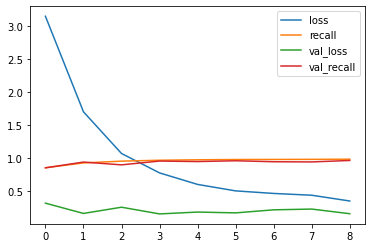

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 96s 16ms/step - loss: 0.0533 - recall: 0.9817


[0.05330551788210869, 0.9817030429840088]

In [ ]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 25s 16ms/step - loss: 0.1615 - recall: 0.9594


[0.16148319840431213, 0.9594038724899292]

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred

* GRU tahminlemeyi predict_proba gibi yapar. Bizim onu 1 ve 0 a donusturmemiz gerekir.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 10786    155]
 [  3364 180492]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     10941
           1       1.00      0.98      0.99    183856

    accuracy                           0.98    194797
   macro avg       0.88      0.98      0.93    194797
weighted avg       0.99      0.98      0.98    194797



In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 2078   657]
 [ 1866 44099]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.76      0.62      2735
           1       0.99      0.96      0.97     45965

    accuracy                           0.95     48700
   macro avg       0.76      0.86      0.80     48700
weighted avg       0.96      0.95      0.95     48700



In [ ]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y_pred2 = np.array([i[0] for i in y_pred])
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
incorrect = np.where(y_test != y_pred2)
incorrect

(array([   26,    37,    49, ..., 48625, 48678, 48688], dtype=int64),)

In [ ]:
len(incorrect)

2523

In [ ]:
idx = incorrect[0][0]
idx

26

In [ ]:
text = X_test[idx]
text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   45,
       1797,   12,  530,    3, 9447,  367])

In [ ]:
tokens_to_string(text)

'biraz gürültülü ama temiz ve kupkuru çıkıyor'

In [ ]:
y_pred[idx]

array([0])

In [ ]:
y_test[idx]

1

In [ ]:
y_pr = model.predict(X_test)

In [ ]:
y_pr[idx]

array([0.3419183], dtype=float32)

## Predicton

In [ ]:
# Positive Commends
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "kelimelerle tarif edilemez"
review4 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review5 = "tam bir fiyat performans ürünü"
review6 = "on numara beş yıldız"
review7 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review8 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fiyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
review9 = "kaliteli bir ürün, memnun kaldım."
review10 = "beklentimi düşük tutmuştum ama beni şaşırttı. Tebrikler."

# Negative Commends
review11 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review12 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review13 = "hiç resimde gösterildiği gibi değil"
review14 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review15 = "beklediğim gibi çıkmadı"
review16 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review17 = "çok kalitesiz bir ürün sakın almayın"
review18 = "verdiğim paraya yazık oldu, beklentilerimi karşılamadı"
review19 = "Bu fiyata çok daha iyi ürünler alabilirdim, kazıklandım."
review20 = "Eh işte idare eder,çok beklentiye girmeyin."


reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, 
           review11, review12, review13, review14, review15, review16,review17,review18,review19,review20]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [ ]:
model.predict(tokens_pad)

array([[0.9966269 ],
       [0.99379   ],
       [0.01147467],
       [0.98382056],
       [0.00567424],
       [0.00429109],
       [0.5179561 ],
       [0.64891165],
       [0.98939705],
       [0.01203054],
       [0.9973519 ],
       [0.9651339 ],
       [0.02152807],
       [0.99411076]], dtype=float32)